#I. Perkenalan


Nama: Hafidz M

Batch: FTDS 006

#II. Import Pustaka

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data
!ls

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 9.02MB/s]
heart-failure-clinical-data.zip  kaggle.json  sample_data


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('heart-failure-clinical-data.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier

from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve


#III. Data Loading

In [ ]:
dfraw=pd.read_csv('/content/files/heart_failure_clinical_records_dataset.csv')
pd.set_option('display.max_columns', None)
dfraw

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


#IV. Data Cleaning

In [ ]:
dfraw.info() #Check Tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
#Check Missing Values
dfraw.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
#Check Duplicate
dfraw.duplicated().sum()

0

In [ ]:
dfclean = dfraw.copy()
dfclean.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#V. EDA

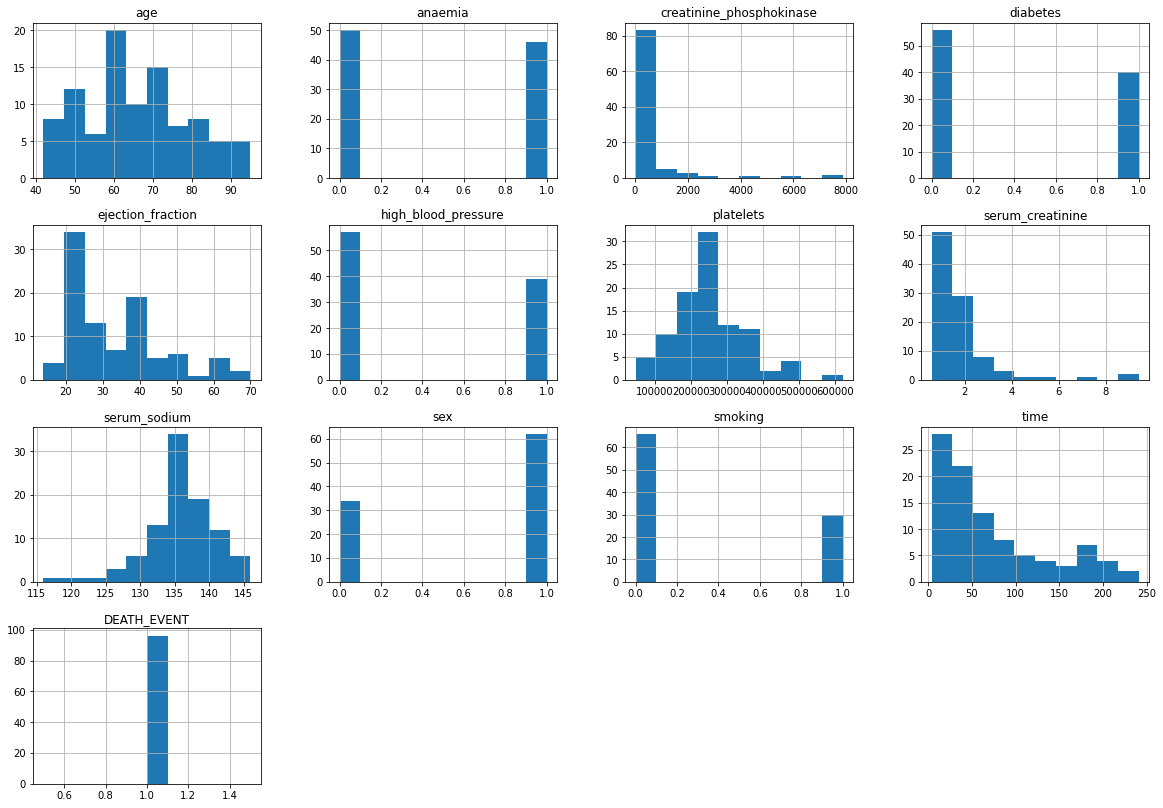

In [ ]:
dfclean[dfclean['DEATH_EVENT'] == 1].hist(figsize=(20,14))
plt.show()

In [ ]:
#Menghitung kematian anaemia 
dfclean.DEATH_EVENT[(dfclean["anaemia"])& 
        (dfclean["DEATH_EVENT"] == 1)].count()

46

In [ ]:
#Menghitung kematian diabetes
dfclean.DEATH_EVENT[(dfclean["diabetes"]) &
        (dfclean["DEATH_EVENT"] == 1)].count()

40

In [ ]:
#Menghitung kematian anaemia & diabetes
dfclean.DEATH_EVENT[(dfclean["diabetes"])& (dfclean["anaemia"])& 
        (dfclean["DEATH_EVENT"] == 1)].count()

18

In [ ]:
#Menghitung kematian anaemia & diabetes & perokok aktitf
dfclean.DEATH_EVENT[(dfclean["diabetes"])& (dfclean["anaemia"])& (dfclean["smoking"])& 
        (dfclean["DEATH_EVENT"] == 1)].count()

3

Dari Hist plot dan data filter diatas dapat diambil informasi bahwa :
* Rentang usia yang mengalami kematian adalah 42 - 95 tahun
* Jumlah yang memiliki penyakit Anaemia yang mengalami kematian sekitar 46 orang
* Jumlah yang memiliki penyakit Diabetes yang mengalami kematian sekitar 40 orang
* Jumlah yang memiliki penyakit Anaemia dan Diabetes yang mengalami kematian sekitar 18 orang
* Jumlah yang memiliki penyakit Anaemia dan Diabetes serta perokok yang mengalami kematian sekitar 3 orang

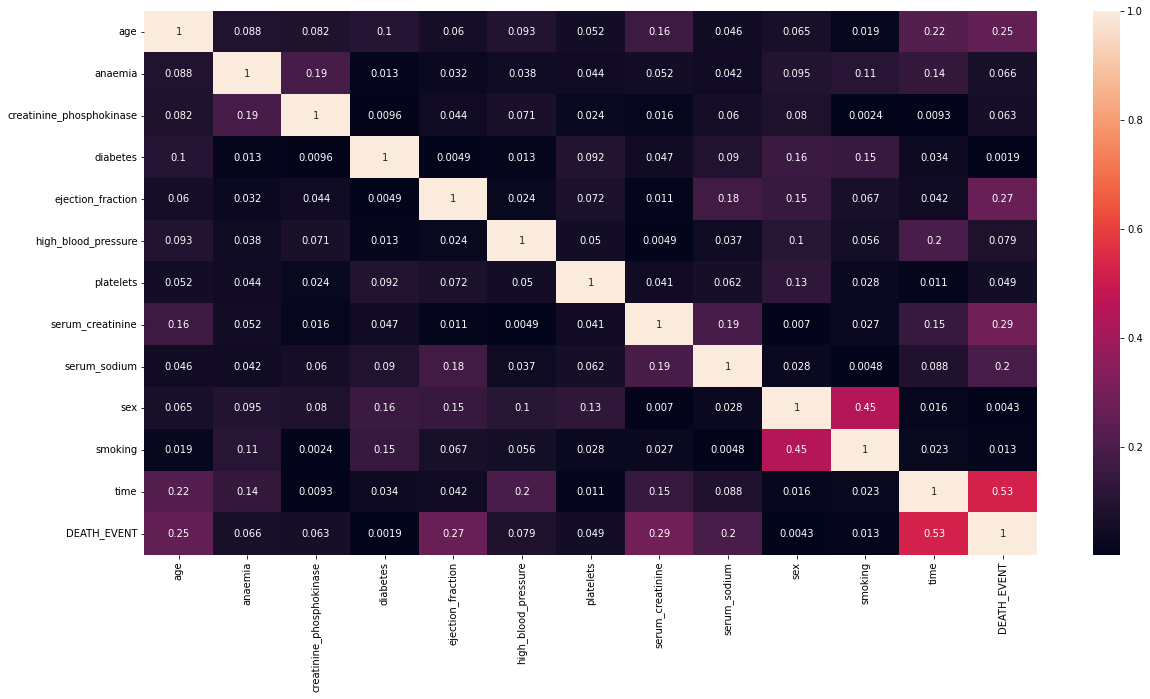

In [ ]:
#heatmap untuk pengecekan correlation
plt.figure(figsize=(20, 10))
sns.heatmap(dfclean.corr().abs(),  annot=True)
plt.show()

Korelasi tertinggi terhadap kolom DEATH_EVENT ada pada kolom Time dan terendah ada pada kolom diabetes

#VI. Data Preprocessing

In [ ]:
X = dfclean.drop('DEATH_EVENT', axis = 1) #Fitur
y = dfclean['DEATH_EVENT'] #Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Presentase untuk data training   :', '%.2f' % ((len(X_train)/len(X))*100), '%')
print('Presentase untuk data test       :', '%.2f' % ((len(X_test)/len(X))*100), '%')
print()

print('Jumlah data training  :', X_train.shape[0])
print('Jumlah data test      :', X_test.shape[0])

Presentase untuk data training   : 79.93 %
Presentase untuk data test       : 20.07 %

Jumlah data training  : 239
Jumlah data test      : 60


In [ ]:
#Normalisasi menggunakan minmax
minmax = MinMaxScaler()
minmax.fit(X_train)
X_train = minmax.transform(X_train)
X_test = minmax.transform(X_test)

#VII. Pelatihan Model dan Evaluasi Model

##Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=200, max_depth= 10, min_samples_leaf= 5, min_samples_split= 2, random_state=42)
rf.fit(X_train, y_train)
%time rftrain = rf.predict(X_train) #train
%time rftest = rf.predict(X_test) #test

CPU times: user 30.1 ms, sys: 0 ns, total: 30.1 ms
Wall time: 31.2 ms
CPU times: user 27.7 ms, sys: 970 µs, total: 28.7 ms
Wall time: 27.2 ms


In [ ]:
#Classification Report
print('Hasil Training Random Forest\n',classification_report(y_train, rftrain)) #train Model

print('\nHasil Testing Random Forest\n',classification_report(y_test, rftest)) #test Model

Hasil Training Random Forest
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       168
           1       0.90      0.85      0.87        71

    accuracy                           0.92       239
   macro avg       0.92      0.90      0.91       239
weighted avg       0.92      0.92      0.92       239


Hasil Testing Random Forest
               precision    recall  f1-score   support

           0       0.71      0.91      0.80        35
           1       0.80      0.48      0.60        25

    accuracy                           0.73        60
   macro avg       0.76      0.70      0.70        60
weighted avg       0.75      0.73      0.72        60



##AdaBoost

In [ ]:
rf_ab = AdaBoostClassifier(rf, n_estimators=200, learning_rate=0.1, algorithm='SAMME', random_state=42)
rf_ab.fit(X_train, y_train)
%time rfabtrain = rf_ab.predict(X_train) #train
%time rfabtest = rf_ab.predict(X_test) #test

CPU times: user 269 ms, sys: 3.22 ms, total: 273 ms
Wall time: 271 ms
CPU times: user 236 ms, sys: 2.35 ms, total: 239 ms
Wall time: 241 ms


In [ ]:
print('Hasil Training AdaBoost Random Forest\n',classification_report(y_train, rfabtrain)) #train Model

print('\nHasil Testing AdaBoost Random Forest\n',classification_report(y_test, rfabtest)) #test Model

Hasil Training AdaBoost Random Forest
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       168
           1       1.00      0.99      0.99        71

    accuracy                           1.00       239
   macro avg       1.00      0.99      0.99       239
weighted avg       1.00      1.00      1.00       239


Hasil Testing AdaBoost Random Forest
               precision    recall  f1-score   support

           0       0.73      0.94      0.83        35
           1       0.87      0.52      0.65        25

    accuracy                           0.77        60
   macro avg       0.80      0.73      0.74        60
weighted avg       0.79      0.77      0.75        60



## Bagging Classifier 

In [ ]:
rf_bg = BaggingClassifier(rf, max_samples=0.5, max_features=0.5,random_state=42)
rf_bg.fit(X_train, y_train)
%time rfbgtrain = rf_ab.predict(X_train) #train
%time rfbgtest = rf_ab.predict(X_test) #test

CPU times: user 259 ms, sys: 0 ns, total: 259 ms
Wall time: 259 ms
CPU times: user 288 ms, sys: 11.3 ms, total: 299 ms
Wall time: 292 ms


In [ ]:
print('Hasil Training Bagging Classifier Random Forest\n',classification_report(y_train, rfbgtrain)) #train Model

print('\nHasil Testing Bagging Classifier Random Forest\n',classification_report(y_test, rfbgtest)) #test Model

Hasil Training Bagging Classifier Random Forest
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       168
           1       1.00      0.99      0.99        71

    accuracy                           1.00       239
   macro avg       1.00      0.99      0.99       239
weighted avg       1.00      1.00      1.00       239


Hasil Testing Bagging Classifier Random Forest
               precision    recall  f1-score   support

           0       0.73      0.94      0.83        35
           1       0.87      0.52      0.65        25

    accuracy                           0.77        60
   macro avg       0.80      0.73      0.74        60
weighted avg       0.79      0.77      0.75        60



##Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
gb.fit(X_train, y_train)
%time gbtrain = gb.predict(X_train) #train
%time gbtest = gb.predict(X_test) #test

CPU times: user 1.6 ms, sys: 0 ns, total: 1.6 ms
Wall time: 1.61 ms
CPU times: user 1.36 ms, sys: 0 ns, total: 1.36 ms
Wall time: 1.22 ms


In [ ]:
print('Hasil Training Gradient Boosting\n',classification_report(y_train, gbtrain)) #train Model

print('\nHasil Testing Gradient Boosting\n',classification_report(y_test, gbtest)) #test Model

Hasil Training Gradient Boosting
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00        71

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239


Hasil Testing Gradient Boosting
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        35
           1       0.61      0.44      0.51        25

    accuracy                           0.65        60
   macro avg       0.64      0.62      0.62        60
weighted avg       0.64      0.65      0.64        60



#VIII. Model Inference

In [ ]:
new_data = [[55.0,	0,	7861,	0,	38, 0,	210000.00,	1.9,	137,	1,	0,	7]]
new_data2 = [[60.0,	0,	2656,	1,	30,	1,	305000.0,	2.3,	137,	1,	0,	30	]]

In [ ]:
#Model Inference Menggunakan algoritma Random Forest Ada Boost
result= rf_ab.predict(minmax.transform(new_data))
print("Berdasarkan Input :",new_data)

if(result==1):
  print('More chance Death Event')

else :
  print('Less chance of Death Event')

result= rf_ab.predict(minmax.transform(new_data2))
print("Berdasarkan Input :",new_data2)
if(result==1):
  print('More chance of Death Event')

else :
  print('Less  chance of Death Event')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


Berdasarkan Input : [[55.0, 0, 7861, 0, 38, 0, 210000.0, 1.9, 137, 1, 0, 7]]
More chance Death Event
Berdasarkan Input : [[60.0, 0, 2656, 1, 30, 1, 305000.0, 2.3, 137, 1, 0, 30]]
More chance of Death Event


#Kesimpulan

Dari hasil Training yang dilakukan dapat disimpulkan bahwa :
* Model Random Forest sudah sangat baik dalam melakukan klasifikasi dikarenakan hasil dari precision dan recall untuk target 1 sudah sangat baik  yaitu :   
                precision    recall  f1-score   support
           0       0.94      0.96      0.95       168
           1       0.90      0.85      0.87        71
dan akurasi yang didapat sudah sangat baik yaitu  0.92
* Untuk model AdaBoost, Bagging Classifier, dan Gradient Boosting hasil training cenderung overfitting dikarenakan mendapat nilai precision 1, recall 0.99 akurasi 100% untuk target 1


---
Dari hasil Testing yang dilakukan dapat disimpulkan bahwa
* Model Random Forest mengalami penurunan dari segi akurasi precision dan recall yaitu:

                 precision    recall  f1-score   support

           0       0.71      0.91      0.80        35
           1       0.80      0.48      0.60        25

untuk akurasi turun menjadi 0.73, tetapi untuk nilai precision target 1 tidak turun begitu jauh sehingga model masih bisa digunakan untuk klasifikasi
* Model AdaBoost dan Bagging Classifier mengalami penurunan yaitu : 
                precision    recall  f1-score   support

           0       0.73      0.94      0.83        35
           1       0.87      0.52      0.65        25
untuk akurasi turun menjadi 0.77, tetapi nilai precision target 1 yang didapat tidak turun begitu jauh, sehingga model masih bisa digunakan untuk klasifikasi dengan baik
* Model Gradien Boosting mengalami penurunan cukup jauh dari segi precision recall dan akurasi, bisa dipastikan bahwa model gradien boosting mengalami overfitting
                precision    recall  f1-score   support

           0       0.67      0.80      0.73        35
           1       0.61      0.44      0.51        25
akurasi 0.65